In [2]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=b9c7395f80a9d113528ebff11a2124195dfe7d9e82a4c06c7edb15a45f2f6ca5
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [11]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.hbos import HBOS
from pyod.models.cblof import CBLOF
import time
import tracemalloc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4/4 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 3ms/step
Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


157/157 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


625/625 [==============================] - 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1563/1563 [==============================] - 4s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


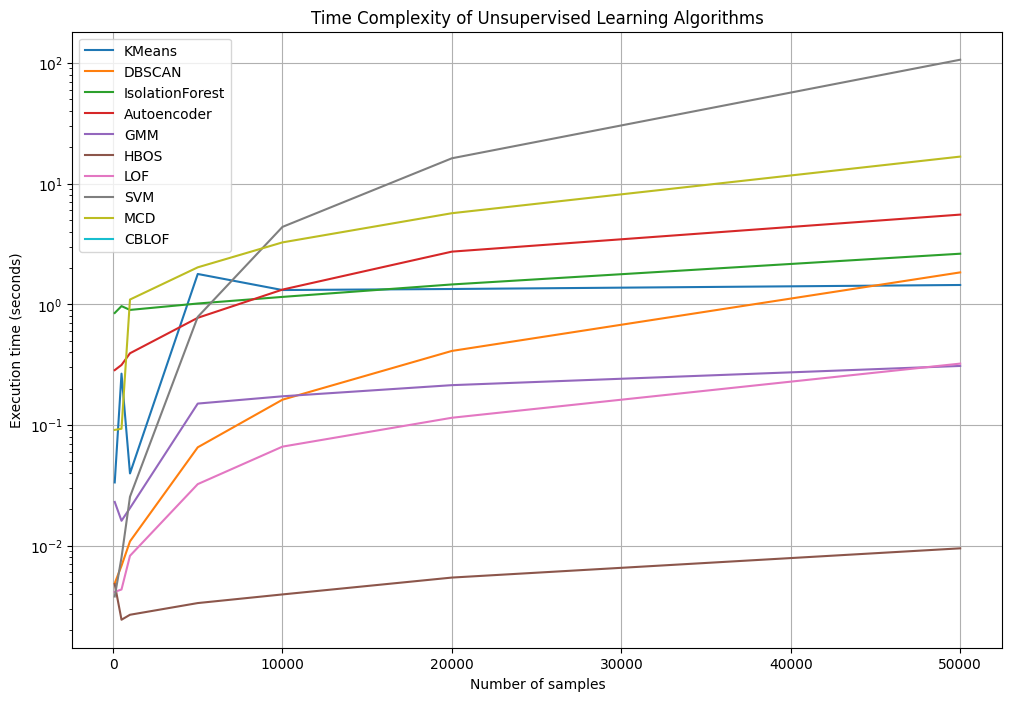

In [9]:
# Function to measure time complexity
def measure_time_complexity(algorithm, data):
    start_time = time.time()
    try:
        if isinstance(algorithm, Model):
            algorithm.predict(data)
        else:
            algorithm.fit(data)
    except Exception as e:
        print(f"Error with algorithm {type(algorithm).__name__}: {e}")
        return None
    end_time = time.time()
    return end_time - start_time

# Function to generate synthetic data
def generate_data(n_samples):
    data, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=42)
    return data

# Function to create an autoencoder model
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# List of number of samples to test
sample_sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]

# Algorithms to test
algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'IsolationForest': IsolationForest(contamination=0.1, random_state=42),
    'Autoencoder': None,  # Placeholder, we'll create the model dynamically
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'HBOS': HBOS(),
    'LOF': LocalOutlierFactor(novelty=True),
    'SVM': OneClassSVM(),
    'MCD': EllipticEnvelope(),
    'CBLOF': CBLOF(n_clusters=5, random_state=42)
}

# Dictionary to store execution times
execution_times = {name: [] for name in algorithms.keys()}

# Measure execution time for each algorithm and each sample size
for n_samples in sample_sizes:
    data = generate_data(n_samples)
    input_dim = data.shape[1]

    # Create autoencoder model dynamically for the current data
    autoencoder = create_autoencoder(input_dim)
    algorithms['Autoencoder'] = autoencoder

    for name, algorithm in algorithms.items():
        # For the autoencoder, we need to fit the model first
        if name == 'Autoencoder':
            try:
                algorithm.fit(data, data, epochs=10, batch_size=32, verbose=0)
            except Exception as e:
                print(f"Error fitting Autoencoder: {e}")
                execution_times[name].append(None)
                continue
        execution_time = measure_time_complexity(algorithm, data)
        execution_times[name].append(execution_time if execution_time is not None else np.nan)

# Plotting the results
plt.figure(figsize=(12, 8))
for name, times in execution_times.items():
    plt.plot(sample_sizes, times, label=name)
plt.xlabel('Number of samples')
plt.ylabel('Execution time (seconds)')
plt.title('Time Complexity of Unsupervised Learning Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4/4 [==============================] - 0s 4ms/step
Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


157/157 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


625/625 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1563/1563 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


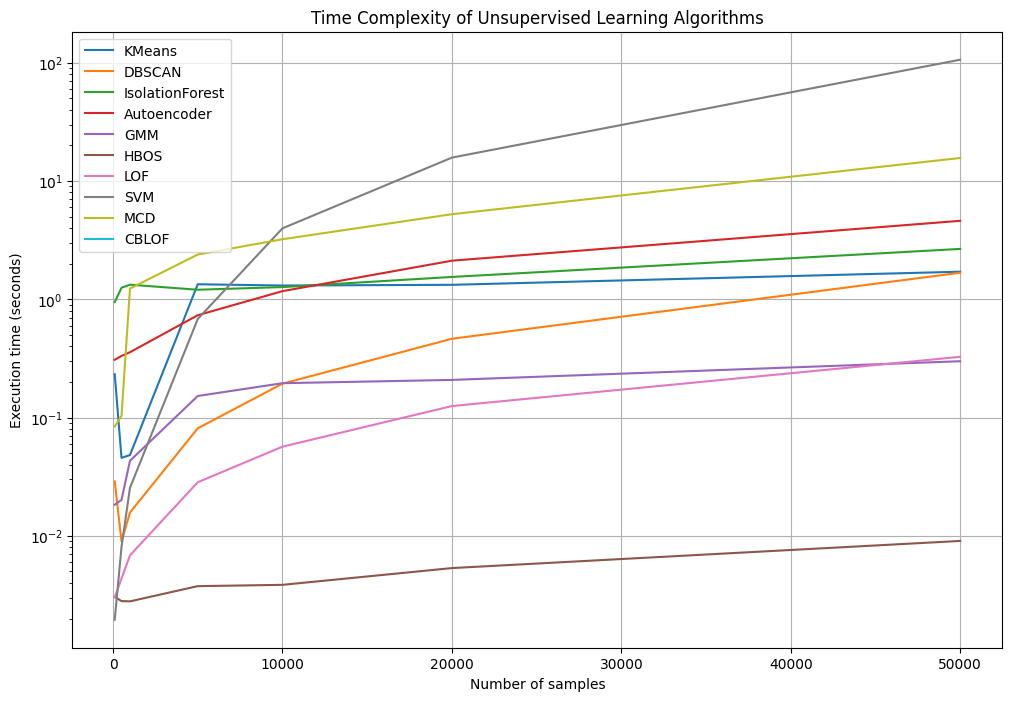

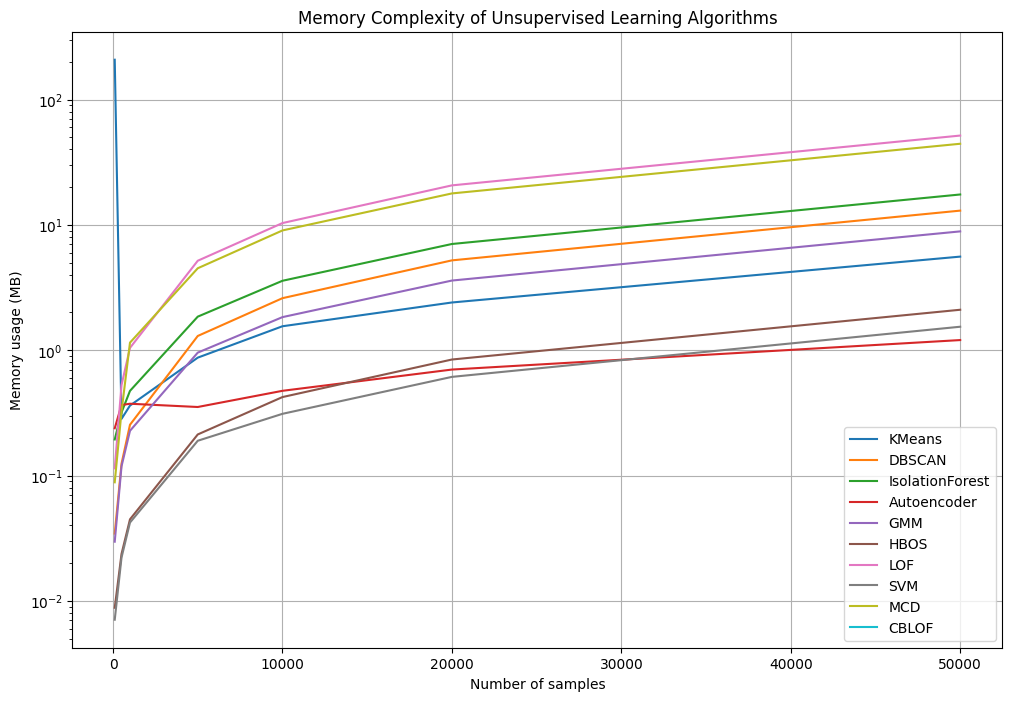

In [10]:
# Function to measure time and memory complexity
def measure_complexity(algorithm, data):
    start_time = time.time()
    tracemalloc.start()
    try:
        if isinstance(algorithm, Model):
            algorithm.predict(data)
        else:
            algorithm.fit(data)
    except Exception as e:
        print(f"Error with algorithm {type(algorithm).__name__}: {e}")
        return None, None
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    peak_memory = peak / 10**6  # Convert to MB
    return execution_time, peak_memory

# Function to generate synthetic data
def generate_data(n_samples):
    data, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=42)
    return data

# Function to create an autoencoder model
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# List of number of samples to test
sample_sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]

# Algorithms to test
algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'IsolationForest': IsolationForest(contamination=0.1, random_state=42),
    'Autoencoder': None,  # Placeholder, we'll create the model dynamically
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'HBOS': HBOS(),
    'LOF': LocalOutlierFactor(novelty=True),
    'SVM': OneClassSVM(),
    'MCD': EllipticEnvelope(),
    'CBLOF': CBLOF(n_clusters=5, random_state=42)
}

# Dictionaries to store execution times and memory usage
execution_times = {name: [] for name in algorithms.keys()}
memory_usages = {name: [] for name in algorithms.keys()}

# Measure execution time and memory usage for each algorithm and each sample size
for n_samples in sample_sizes:
    data = generate_data(n_samples)
    input_dim = data.shape[1]

    # Create autoencoder model dynamically for the current data
    autoencoder = create_autoencoder(input_dim)
    algorithms['Autoencoder'] = autoencoder

    for name, algorithm in algorithms.items():
        # For the autoencoder, we need to fit the model first
        if name == 'Autoencoder':
            try:
                algorithm.fit(data, data, epochs=10, batch_size=32, verbose=0)
            except Exception as e:
                print(f"Error fitting Autoencoder: {e}")
                execution_times[name].append(None)
                memory_usages[name].append(None)
                continue
        execution_time, peak_memory = measure_complexity(algorithm, data)
        execution_times[name].append(execution_time if execution_time is not None else np.nan)
        memory_usages[name].append(peak_memory if peak_memory is not None else np.nan)

# Plotting the results
plt.figure(figsize=(12, 8))
for name, times in execution_times.items():
    plt.plot(sample_sizes, times, label=name)
plt.xlabel('Number of samples')
plt.ylabel('Execution time (seconds)')
plt.title('Time Complexity of Unsupervised Learning Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for name, memory in memory_usages.items():
    plt.plot(sample_sizes, memory, label=name)
plt.xlabel('Number of samples')
plt.ylabel('Memory usage (MB)')
plt.title('Memory Complexity of Unsupervised Learning Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32/32 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7417.410708247931325 > -7418.021598069597530). You may want to try with a higher value of support_fraction (current value: 0.754).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7410.654789904033350 > -7411.893031765421256). You may want to try with a higher value of support_fraction (current value: 0.754).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7413.322584254741741 > -7415.320496766575161). You may want to try with a higher value of support_fraction (current value: 0.754).
  warnings.warn(
/usr

Error with algorithm CBLOF: Could not form valid cluster separation. Please change n_clusters or change clustering method


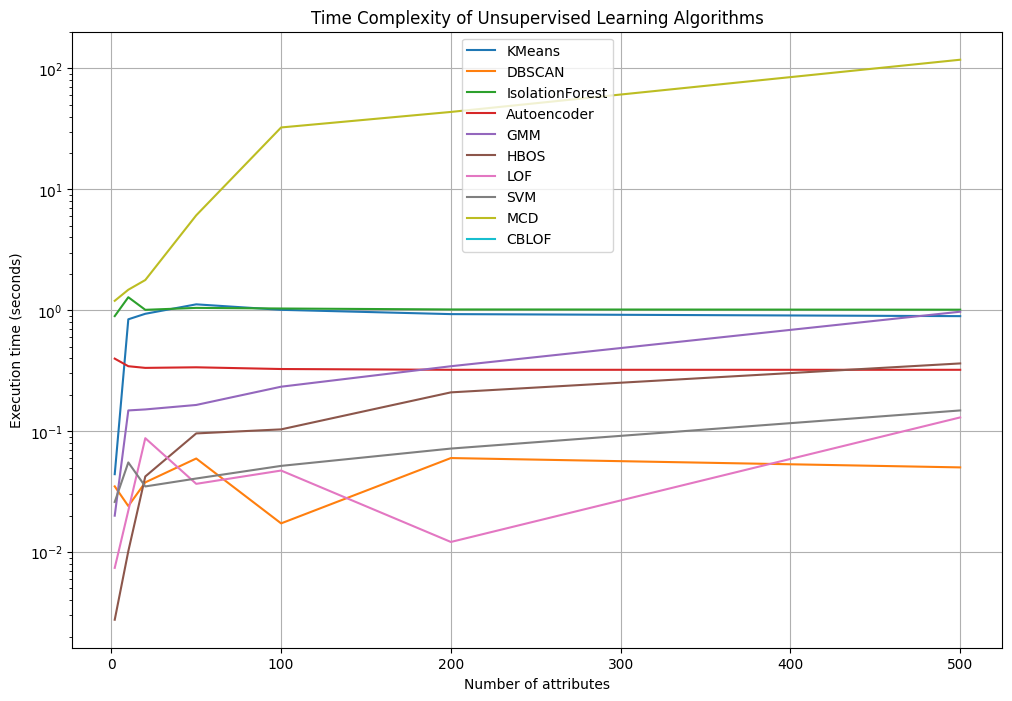

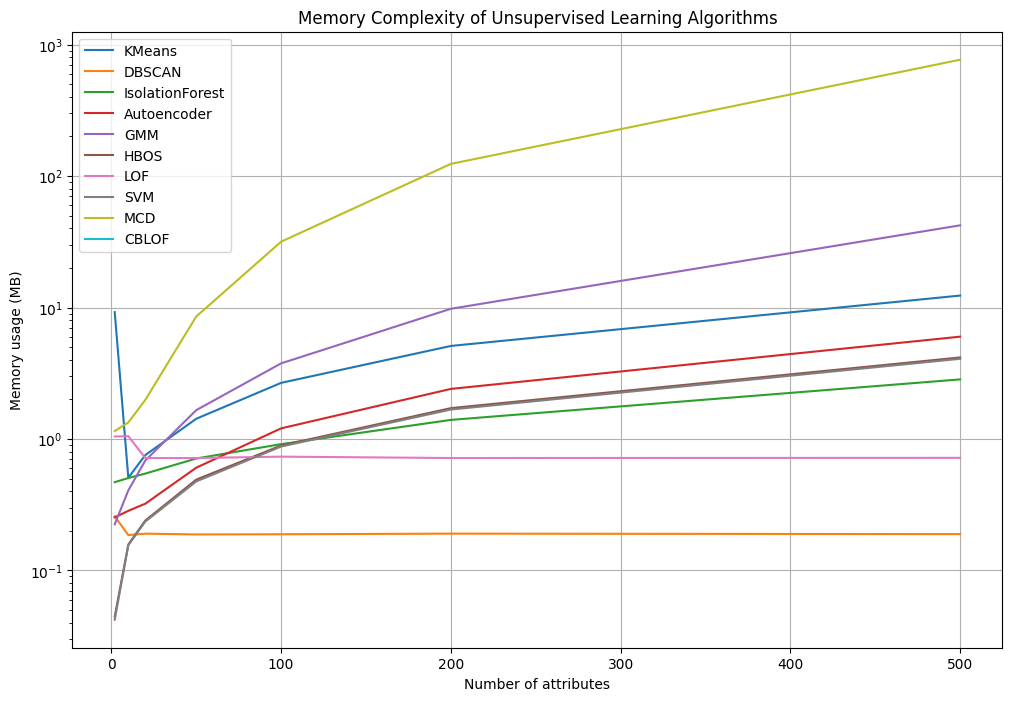

In [12]:

# Function to measure time and memory complexity
def measure_complexity(algorithm, data):
    start_time = time.time()
    tracemalloc.start()
    try:
        if isinstance(algorithm, Model):
            algorithm.predict(data)
        else:
            algorithm.fit(data)
    except Exception as e:
        print(f"Error with algorithm {type(algorithm).__name__}: {e}")
        return None, None
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = end_time - start_time
    peak_memory = peak / 10**6  # Convert to MB
    return execution_time, peak_memory

# Function to generate synthetic data
def generate_data(n_samples, n_features):
    data, _ = make_blobs(n_samples=n_samples, centers=5, n_features=n_features, random_state=42)
    return data

# Function to create an autoencoder model
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Number of samples to test
n_samples = 1000

# List of number of attributes to test
attribute_sizes = [2, 10, 20, 50, 100, 200, 500]

# Algorithms to test
algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'IsolationForest': IsolationForest(contamination=0.1, random_state=42),
    'Autoencoder': None,  # Placeholder, we'll create the model dynamically
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'HBOS': HBOS(),
    'LOF': LocalOutlierFactor(novelty=True),
    'SVM': OneClassSVM(),
    'MCD': EllipticEnvelope(),
    'CBLOF': CBLOF(n_clusters=5, random_state=42)
}

# Dictionaries to store execution times and memory usage
execution_times = {name: [] for name in algorithms.keys()}
memory_usages = {name: [] for name in algorithms.keys()}

# Measure execution time and memory usage for each algorithm and each attribute size
for n_features in attribute_sizes:
    data = generate_data(n_samples, n_features)
    input_dim = data.shape[1]

    # Create autoencoder model dynamically for the current data
    autoencoder = create_autoencoder(input_dim)
    algorithms['Autoencoder'] = autoencoder

    for name, algorithm in algorithms.items():
        # For the autoencoder, we need to fit the model first
        if name == 'Autoencoder':
            try:
                algorithm.fit(data, data, epochs=10, batch_size=32, verbose=0)
            except Exception as e:
                print(f"Error fitting Autoencoder: {e}")
                execution_times[name].append(None)
                memory_usages[name].append(None)
                continue
        execution_time, peak_memory = measure_complexity(algorithm, data)
        execution_times[name].append(execution_time if execution_time is not None else np.nan)
        memory_usages[name].append(peak_memory if peak_memory is not None else np.nan)

# Plotting the results
plt.figure(figsize=(12, 8))
for name, times in execution_times.items():
    plt.plot(attribute_sizes, times, label=name)
plt.xlabel('Number of attributes')
plt.ylabel('Execution time (seconds)')
plt.title('Time Complexity of Unsupervised Learning Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for name, memory in memory_usages.items():
    plt.plot(attribute_sizes, memory, label=name)
plt.xlabel('Number of attributes')
plt.ylabel('Memory usage (MB)')
plt.title('Memory Complexity of Unsupervised Learning Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()
